In [1]:
import yfinance as yf
import pandas as pd

# List of selected companies
companies = {
    'Sun Pharmaceutical': 'SUNPHARMA.NS',
    'Divis Laboratories': 'DIVISLAB.NS',
    'Cipla': 'CIPLA.NS',
    'Dr. Reddy': 'DRREDDY.NS',
    'Lupin': 'LUPIN.NS',
    'Torrent Pharmaceuticals': 'TORNTPHARM.NS',
    'Aurobindo Pharma': 'AUROPHARMA.NS',
    'Zydus Lifesciences': 'ZYDUSLIFE.NS',
    'Alkem Laboratories': 'ALKEM.NS',
    'Glenmark Pharmaceuticals': 'GLENMARK.NS',
    'Biocon': 'BIOCON.NS',
    'Piramal Enterprises': 'PEL.NS',
    'Abbott India': 'ABBOTINDIA.NS',
    'Ipca Laboratories': 'IPCALAB.NS',
    'Mankind Pharma': 'MANKIND.NS',
    'Jubilant Life Sciences': 'JUBLFOOD.NS',
    'Aarti Drugs': 'AARTIDRUGS.NS',
    'Granules India': 'GRANULES.NS',
    'Strides Pharma Science': 'STAR.NS',
    'Caplin Point Lab': 'CAPLIPOINT.NS',
}
# Dictionary to store the financial data for each company
financial_data = {}

# Fetch financial data for each company
for company_name, ticker in companies.items():
    stock = yf.Ticker(ticker)
    financial_data[company_name] = {
        'income_statement': stock.financials.T,
        'balance_sheet': stock.balance_sheet.T,
        'cashflow_statement': stock.cashflow.T,
        'market_price': stock.history(period='1d')['Close'][-1],  # Most recent market price
        'market_cap': stock.info.get('marketCap', None),
        'sector': stock.info.get('sector', None),
        'industry': stock.info.get('industry', None)
    }

C:\Users\DELL\AppData\Local\Temp\ipykernel_5884\1378810293.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'market_price': stock.history(period='1d')['Close'][-1],  # Most recent market price
C:\Users\DELL\AppData\Local\Temp\ipykernel_5884\1378810293.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'market_price': stock.history(period='1d')['Close'][-1],  # Most recent market price
C:\Users\DELL\AppData\Local\Temp\ipykernel_5884\1378810293.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Data

#Profitability Ratios

In [2]:
# Gross Profit Margin = (Gross Profit / Total Revenue) * 100
def calculate_gross_profit_margin(income_statement):
    gross_profit = income_statement.get('Gross Profit', 0)
    total_revenue = income_statement.get('Total Revenue', 0)
    return (gross_profit / total_revenue) * 100
# Operating Profit Margin = Operating Income / Total Revenue
def calculate_operating_profit_margin(income_statement):
    operating_income = income_statement.get('Operating Income', 0)
    total_revenue = income_statement.get('Total Revenue', 0)
    return (operating_income / total_revenue)*100
# Net Profit Margin = Net Income / Total Revenue
def calculate_net_profit_margin(income_statement):
    net_income = income_statement.get('Net Income', 0)
    total_revenue = income_statement.get('Total Revenue', 0)
    return (net_income / total_revenue)*100
# Return on Assets (ROA) = Net Income / Total Assets
def calculate_roa(income_statement, balance_sheet):
    net_income = income_statement.get('Net Income', 0)
    total_assets = balance_sheet.get('Total Assets', 0)
    return (net_income / total_assets)*100
# Return on Equity (ROE) = Net Income / Shareholders' Equity
def calculate_roe(income_statement, balance_sheet):
    net_income = income_statement.get('Net Income', 0)
    shareholders_equity = balance_sheet.get('Stockholders Equity', 0)
    return (net_income / shareholders_equity)*100

# Liquidity Ratios

In [3]:
def calculate_total_current_assets(balance_sheet):
    cash = balance_sheet.get('Cash Cash Equivalents And Short Term Investments', 0)
    receivables = balance_sheet.get('Accounts Receivable', 0)
    inventory = balance_sheet.get('Inventory', 0)
    other_current_assets = balance_sheet.get('Other Current Assets', 0)

    total_current_assets = cash + receivables + inventory + other_current_assets
    return total_current_assets
def calculate_total_current_liabilities(balance_sheet):
    accounts_payable = balance_sheet.get('Accounts Payable', 0)
    current_debt = balance_sheet.get('Current Debt', 0)
    other_current_liabilities = balance_sheet.get('Other Current Liabilities', 0)

    total_current_liabilities = accounts_payable + current_debt + other_current_liabilities
    return total_current_liabilities
# Current Ratio = Total Current Assets / Total Current Liabilities
def calculate_current_ratio(balance_sheet):
    total_current_assets = calculate_total_current_assets(balance_sheet)
    total_current_liabilities = calculate_total_current_liabilities(balance_sheet)
    return total_current_assets / total_current_liabilities

# Quick Ratio = (Current Assets - Inventory) / Current Liabilities
def calculate_quick_ratio(balance_sheet):
    total_current_assets = calculate_total_current_assets(balance_sheet)
    inventory = balance_sheet.get('Inventory', 0)
    total_current_liabilities = calculate_total_current_liabilities(balance_sheet)
    return (total_current_assets - inventory) / total_current_liabilities

# Solvency Ratios


In [4]:
# Debt-to-Equity Ratio = Total Debt / Shareholders' Equity
def calculate_debt_to_equity_ratio(balance_sheet):
    total_debt = balance_sheet.get('Total Debt', 0)
    shareholders_equity = balance_sheet.get('Stockholders Equity', 0)
    return total_debt / shareholders_equity

# Interest Coverage Ratio = EBIT / Interest Expense
def calculate_interest_coverage_ratio(income_statement):
    ebit = income_statement.get('EBIT', 0)
    interest_expense = income_statement.get('Interest Expense', 0)
    if isinstance(interest_expense, pd.Series):
        interest_expense = interest_expense.iloc[0]  # Get the first value (assuming single row)

    if interest_expense == 0:
        return float('inf')  # Handle division by zero
    return ebit / interest_expense

# Efficiency Ratios


In [5]:
# Inventory Turnover Ratio = Cost of Revenue / Inventory
def calculate_inventory_turnover_ratio(income_statement, balance_sheet):
    cost_of_revenue = income_statement.get('Cost Of Revenue', 0)
    inventory = balance_sheet.get('Inventory', 0)
    return cost_of_revenue / inventory

# Accounts Receivable Turnover Ratio = Total Revenue / Accounts Receivable
def calculate_accounts_receivable_turnover_ratio(income_statement, balance_sheet):
    total_revenue = income_statement.get('Total Revenue', 0)
    accounts_receivable = balance_sheet.get('Accounts Receivable', 0)
    return total_revenue / accounts_receivable

# Accounts Payable Turnover Ratio = Total Revenue / Accounts Payable
def calculate_accounts_payable_turnover_ratio(income_statement, balance_sheet):
    total_revenue = income_statement.get('Cost Of Revenue', 0)
    accounts_payable = balance_sheet.get('Accounts Payable', 0)
    return total_revenue / accounts_payable

# Valuation Ratios

In [6]:
# Earnings Per Share (EPS) = Net Income / Basic Average Shares
def calculate_eps(income_statement):
    net_income = income_statement.get('Net Income', 0)
    basic_shares = income_statement.get('Basic Average Shares', 0)
    return net_income / basic_shares

# Price-to-Earnings (P/E) Ratio = Price / EPS
def calculate_pe_ratio(market_price, eps):
    return market_price / eps

# Price-to-Book (P/B) Ratio = Price / Book Value per Share
def calculate_pb_ratio(market_price, balance_sheet):
    book_value = balance_sheet.get('Stockholders Equity', 0)
    shares_outstanding = balance_sheet.get('Ordinary Shares Number', 0)
    book_value_per_share = book_value / shares_outstanding
    return market_price / book_value_per_share

# Price-to-Sales (P/S) Ratio = Price / Sales per Share
def calculate_ps_ratio(market_price, income_statement, balance_sheet):
    total_revenue = income_statement.get('Total Revenue', 0)
    shares_outstanding = balance_sheet.get('Ordinary Shares Number', 0)
    revenue_per_share  = total_revenue / shares_outstanding
    return market_price / revenue_per_share

# Dividend Yield = Dividends per Share / Price
def calculate_dividend_yield(dividends_per_share, market_price):
    return dividends_per_share / market_price
# Beta (assumed data from external sources)
def calculate_beta(beta_value):
    return beta_value

In [7]:
# Create a DataFrame to store all calculated ratios
columns = ['Gross Profit Margin', 'Operating Profit Margin', 'Net Profit Margin', 'Return on Assets', 'Return on Equity',
           'Current Ratio', 'Quick Ratio', 'Debt-to-Equity Ratio', 'Interest Coverage Ratio',
           'Inventory Turnover Ratio', 'Accounts Receivable Turnover Ratio', 'Accounts Payable Turnover Ratio',
           'EPS', 'P/E Ratio', 'P/B Ratio', 'P/S Ratio', 'Dividend Yield', 'Beta']

ratios_df = pd.DataFrame(columns=columns, index=companies.keys())

# Calculate all the ratios for each company and populate the DataFrame
for company_name, data in financial_data.items():
    income_statement = data['income_statement']
    balance_sheet = data['balance_sheet']
    cashflow_statement = data['cashflow_statement']
    market_price = data['market_price']
     # Get the date from the index of income statement
    dates = income_statement.index

    for date in dates:
        ratios_df.at[company_name, 'Date'] = date

    # Profitability Ratios
    ratios_df.at[company_name, 'Gross Profit Margin'] = calculate_gross_profit_margin(income_statement)
    ratios_df.at[company_name, 'Operating Profit Margin'] = calculate_operating_profit_margin(income_statement)
    ratios_df.at[company_name, 'Net Profit Margin'] = calculate_net_profit_margin(income_statement)
    ratios_df.at[company_name, 'Return on Assets'] = calculate_roa(income_statement, balance_sheet)
    ratios_df.at[company_name, 'Return on Equity'] = calculate_roe(income_statement, balance_sheet)

    # Liquidity Ratios
    ratios_df.at[company_name, 'Current Ratio'] = calculate_current_ratio(balance_sheet)
    ratios_df.at[company_name, 'Quick Ratio'] = calculate_quick_ratio(balance_sheet)

    # Solvency Ratios
    ratios_df.at[company_name, 'Debt-to-Equity Ratio'] = calculate_debt_to_equity_ratio(balance_sheet)
    ratios_df.at[company_name, 'Interest Coverage Ratio'] = calculate_interest_coverage_ratio(income_statement)

    # Efficiency Ratios
    ratios_df.at[company_name, 'Accounts Receivable Turnover Ratio'] = calculate_accounts_receivable_turnover_ratio(income_statement, balance_sheet)
    ratios_df.at[company_name, 'Accounts Payable Turnover Ratio'] = calculate_accounts_payable_turnover_ratio(income_statement, balance_sheet)
    #Valuation Ratios
    ratios_df.at[company_name, 'EPS'] = calculate_eps(income_statement)
    ratios_df.at[company_name, 'P/E Ratio'] = calculate_pe_ratio(market_price, calculate_eps(income_statement))
    ratios_df.at[company_name, 'P/B Ratio'] = calculate_pb_ratio(market_price, balance_sheet=balance_sheet)
    ratios_df.at[company_name, 'P/S Ratio'] = calculate_ps_ratio(market_price, income_statement, balance_sheet)
    ratios_df.at[company_name, 'Dividend Yield'] = calculate_dividend_yield(cashflow_statement.get('Dividend Per Share', 0), market_price)
    ratios_df.at[company_name, 'Beta'] = calculate_beta

In [8]:
# List to collect all ratios data
all_ratios_data = []

# Calculate ratios and add company information
for company_name, data in financial_data.items():
    income_statement = data['income_statement']
    balance_sheet = data['balance_sheet']
    cashflow_statement = data['cashflow_statement']
    market_price = data['market_price']
    market_cap = data['market_cap']
    sector = data['sector']
    industry = data['industry']

    # Iterate through each date in the income statement
    for date in income_statement.index:
        ratio_data = {
            'Company': company_name,
            'Date': date,
            'Market Cap': market_cap,
            'Sector': sector,
            'Industry': industry,
            'Market Price': market_price,
            'Gross Profit Margin': calculate_gross_profit_margin(income_statement.loc[date]),
            'Operating Profit Margin': calculate_operating_profit_margin(income_statement.loc[date]),
            'Net Profit Margin': calculate_net_profit_margin(income_statement.loc[date]),
            'Return on Assets': calculate_roa(income_statement.loc[date], balance_sheet.loc[date]),
            'Return on Equity': calculate_roe(income_statement.loc[date], balance_sheet.loc[date]),
            'Current Ratio': calculate_current_ratio(balance_sheet.loc[date]),
            'Quick Ratio': calculate_quick_ratio(balance_sheet.loc[date]),
            'Debt-to-Equity Ratio': calculate_debt_to_equity_ratio(balance_sheet.loc[date]),
            'Interest Coverage Ratio': calculate_interest_coverage_ratio(income_statement.loc[date]),
            'Accounts Receivable Turnover Ratio': calculate_accounts_receivable_turnover_ratio(income_statement.loc[date], balance_sheet.loc[date]),
            'Accounts Payable Turnover Ratio': calculate_accounts_payable_turnover_ratio(income_statement.loc[date], balance_sheet.loc[date]),
            'EPS': calculate_eps(income_statement.loc[date]),
            'P/E Ratio': calculate_pe_ratio(market_price, calculate_eps(income_statement.loc[date])),
            'P/B Ratio': calculate_pb_ratio(market_price, balance_sheet=balance_sheet.loc[date]),
            'P/S Ratio': calculate_ps_ratio(market_price, income_statement.loc[date], balance_sheet.loc[date]),

            'Dividend Yield': calculate_dividend_yield(cashflow_statement.loc[date].get('Dividend Per Share', 0), market_price),
        }
        all_ratios_data.append(ratio_data)

# Create the final DataFrame
restructured_ratios_df = pd.DataFrame(all_ratios_data)


In [9]:
# Market Cap in Cr.
restructured_ratios_df['Market Cap'] = restructured_ratios_df['Market Cap'] / 100000000

In [10]:
restructured_ratios_df

,Company,Date,Market Cap,Sector,Industry,Market Price,Gross Profit Margin,Operating Profit Margin,Net Profit Margin,Return on Assets,...,Quick Ratio,Debt-to-Equity Ratio,Interest Coverage Ratio,Accounts Receivable Turnover Ratio,Accounts Payable Turnover Ratio,EPS,P/E Ratio,P/B Ratio,P/S Ratio,Dividend Yield
0,Sun Pharmaceutical,2024-03-31,42970.799145,Healthcare,Drug Manufacturers - Specialty & Generic,1790.949951,74.727697,21.919011,20.051698,11.205309,...,3.240699,0.051419,47.495953,4.245433,2.134976,39.912643,44.871745,6.749345,8.997547,0.0
1,Sun Pharmaceutical,2023-03-31,42970.799145,Healthcare,Drug Manufacturers - Specialty & Generic,1790.949951,72.405888,21.436234,19.579023,10.494431,...,2.178629,0.122972,55.700174,3.783611,2.101976,35.316369,50.711610,7.674006,9.928838,0.0
2,Sun Pharmaceutical,2022-03-31,42970.799145,Healthcare,Drug Manufacturers - Specialty & Generic,1790.949951,73.061399,21.079299,8.516875,4.688734,...,4.094862,0.026875,36.189007,3.627567,2.310952,13.600000,131.687496,8.950176,11.182642,0.0
3,Sun Pharmaceutical,2021-03-31,42970.799145,Healthcare,Drug Manufacturers - Specialty & Generic,1790.949951,70.254277,19.300769,8.737740,4.291356,...,2.538750,0.083262,20.841023,3.667544,2.487737,12.102604,147.980551,9.248454,12.930155,0.0
4,Divis Laboratories,2024-03-31,15821.819085,Healthcare,Drug Manufacturers - Specialty & Generic,5959.950195,58.068240,23.499230,20.523345,10.342599,...,7.224561,0.000221,722.000000,3.615955,3.967233,60.270786,98.886220,11.658533,20.294760,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Caplin Point Lab,2024-03-31,1614.394982,Healthcare,Drug Manufacturers - Specialty & Generic,2121.699951,57.252819,29.396140,26.980698,16.945332,...,6.233877,0.000851,724.628205,3.121499,3.458192,60.190000,35.250041,6.957965,9.510985,0.0
88,Caplin Point Lab,2023-03-31,1614.394982,Healthcare,Drug Manufacturers - Specialty & Generic,2121.699951,54.783089,27.003607,25.652983,17.169846,...,6.485888,0.002765,579.653846,3.722098,4.034860,49.620000,42.758967,8.563923,10.979720,0.0
89,Caplin Point Lab,2022-03-31,1614.394982,Healthcare,Drug Manufacturers - Specialty & Generic,2121.699951,56.081172,27.396192,23.620422,17.268706,...,5.709291,0.001435,552.171429,3.966163,3.416534,39.610000,53.564755,10.836175,12.667401,0.0
90,Caplin Point Lab,2021-03-31,1614.394982,Healthcare,Drug Manufacturers - Specialty & Generic,2121.699951,54.677275,27.982562,23.111633,17.766810,...,7.300931,0.015508,198.245283,3.752363,5.368362,32.028185,66.244776,13.534083,15.310249,0.0


In [11]:
# Drop the NaN Values
restructured_ratios_df.dropna(inplace=True)

In [12]:
restructured_ratios_df.head()

,Company,Date,Market Cap,Sector,Industry,Market Price,Gross Profit Margin,Operating Profit Margin,Net Profit Margin,Return on Assets,...,Quick Ratio,Debt-to-Equity Ratio,Interest Coverage Ratio,Accounts Receivable Turnover Ratio,Accounts Payable Turnover Ratio,EPS,P/E Ratio,P/B Ratio,P/S Ratio,Dividend Yield
0,Sun Pharmaceutical,2024-03-31,42970.799145,Healthcare,Drug Manufacturers - Specialty & Generic,1790.949951,74.727697,21.919011,20.051698,11.205309,...,3.240699,0.051419,47.495953,4.245433,2.134976,39.912643,44.871745,6.749345,8.997547,0.0
1,Sun Pharmaceutical,2023-03-31,42970.799145,Healthcare,Drug Manufacturers - Specialty & Generic,1790.949951,72.405888,21.436234,19.579023,10.494431,...,2.178629,0.122972,55.700174,3.783611,2.101976,35.316369,50.711610,7.674006,9.928838,0.0
2,Sun Pharmaceutical,2022-03-31,42970.799145,Healthcare,Drug Manufacturers - Specialty & Generic,1790.949951,73.061399,21.079299,8.516875,4.688734,...,4.094862,0.026875,36.189007,3.627567,2.310952,13.600000,131.687496,8.950176,11.182642,0.0
3,Sun Pharmaceutical,2021-03-31,42970.799145,Healthcare,Drug Manufacturers - Specialty & Generic,1790.949951,70.254277,19.300769,8.737740,4.291356,...,2.538750,0.083262,20.841023,3.667544,2.487737,12.102604,147.980551,9.248454,12.930155,0.0
4,Divis Laboratories,2024-03-31,15821.819085,Healthcare,Drug Manufacturers - Specialty & Generic,5959.950195,58.068240,23.499230,20.523345,10.342599,...,7.224561,0.000221,722.000000,3.615955,3.967233,60.270786,98.886220,11.658533,20.294760,0.0


In [13]:
def calculate_sector_ratios(df):
    # Group by Sector and Year
    sector_ratios = df.groupby(['Sector', df['Date'].dt.year])[['P/E Ratio', 'P/B Ratio', 'P/S Ratio']].mean()

    # Rename columns for clarity
    sector_ratios = sector_ratios.rename(columns={
        'P/E Ratio': 'Sector P/E',
        'P/B Ratio': 'Sector P/B',
        'P/S Ratio': 'Sector P/S'
    })

    return sector_ratios

In [14]:
# Calculate sector averages
sector_averages = calculate_sector_ratios(restructured_ratios_df)

# Merge with restructured_ratios_df
restructured_ratios_df = pd.merge(
    restructured_ratios_df,
    sector_averages,
    left_on=['Sector', restructured_ratios_df['Date'].dt.year],
    right_index=True,
    how='left'
)
restructured_ratios_df

,Company,key_1,Date,Market Cap,Sector,Industry,Market Price,Gross Profit Margin,Operating Profit Margin,Net Profit Margin,...,Accounts Receivable Turnover Ratio,Accounts Payable Turnover Ratio,EPS,P/E Ratio,P/B Ratio,P/S Ratio,Dividend Yield,Sector P/E,Sector P/B,Sector P/S
0,Sun Pharmaceutical,2024,2024-03-31,42970.799145,Healthcare,Drug Manufacturers - Specialty & Generic,1790.949951,74.727697,21.919011,20.051698,...,4.245433,2.134976,39.912643,44.871745,6.749345,8.997547,0.0,26.714307,7.065237,6.525712
1,Sun Pharmaceutical,2023,2023-03-31,42970.799145,Healthcare,Drug Manufacturers - Specialty & Generic,1790.949951,72.405888,21.436234,19.579023,...,3.783611,2.101976,35.316369,50.711610,7.674006,9.928838,0.0,64.403550,7.506633,6.926251
2,Sun Pharmaceutical,2022,2022-03-31,42970.799145,Healthcare,Drug Manufacturers - Specialty & Generic,1790.949951,73.061399,21.079299,8.516875,...,3.627567,2.310952,13.600000,131.687496,8.950176,11.182642,0.0,44.691162,8.353889,7.412840
3,Sun Pharmaceutical,2021,2021-03-31,42970.799145,Healthcare,Drug Manufacturers - Specialty & Generic,1790.949951,70.254277,19.300769,8.737740,...,3.667544,2.487737,12.102604,147.980551,9.248454,12.930155,0.0,58.477645,9.330053,8.461818
4,Divis Laboratories,2024,2024-03-31,15821.819085,Healthcare,Drug Manufacturers - Specialty & Generic,5959.950195,58.068240,23.499230,20.523345,...,3.615955,3.967233,60.270786,98.886220,11.658533,20.294760,0.0,26.714307,7.065237,6.525712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Strides Pharma Science,2021,2021-03-31,1420.294390,Healthcare,Drug Manufacturers - Specialty & Generic,1544.500000,56.668322,12.957580,8.256819,...,2.927420,1.242091,29.956833,51.557519,4.988447,4.260401,0.0,58.477645,9.330053,8.461818
87,Caplin Point Lab,2024,2024-03-31,1614.394982,Healthcare,Drug Manufacturers - Specialty & Generic,2121.699951,57.252819,29.396140,26.980698,...,3.121499,3.458192,60.190000,35.250041,6.957965,9.510985,0.0,26.714307,7.065237,6.525712
88,Caplin Point Lab,2023,2023-03-31,1614.394982,Healthcare,Drug Manufacturers - Specialty & Generic,2121.699951,54.783089,27.003607,25.652983,...,3.722098,4.034860,49.620000,42.758967,8.563923,10.979720,0.0,64.403550,7.506633,6.926251
89,Caplin Point Lab,2022,2022-03-31,1614.394982,Healthcare,Drug Manufacturers - Specialty & Generic,2121.699951,56.081172,27.396192,23.620422,...,3.966163,3.416534,39.610000,53.564755,10.836175,12.667401,0.0,44.691162,8.353889,7.412840


# Quantile Scoring

In [15]:
# Define a scoring function based on quantiles with custom high/low preferences
def quantile_scoring(df, high_value_columns, low_value_columns, quantiles=[0.25, 0.5, 0.75]):
    # Apply scoring for columns where high values are preferred
    for column in high_value_columns:
        df[f'{column}_Score'] = pd.qcut(df[column], q=[0] + quantiles + [1], labels=[0, 1, 2, 3], duplicates='drop')
        df[f'{column}_Score'] = df[f'{column}_Score'].cat.codes  # Convert categorical scores to codes
        df[f'{column}_Score'].fillna(0, inplace=True)  # Fill NaN with a default score (0)
        df[f'{column}_Score'] = df[f'{column}_Score'].astype(int)  # Convert to integer

    # Apply scoring for columns where low values are preferred
    for column in low_value_columns:
        df[f'{column}_Score'] = pd.qcut(df[column], q=[0] + quantiles + [1], labels=[3, 2, 1, 0], duplicates='drop')
        df[f'{column}_Score'] = df[f'{column}_Score'].cat.codes  # Convert categorical scores to codes
        df[f'{column}_Score'].fillna(0, inplace=True)  # Fill NaN with a default score (0)
        df[f'{column}_Score'] = df[f'{column}_Score'].astype(int)  # Convert to integer

    return df

# Define which columns favor high vs. low values
high_value_columns = [
    'Gross Profit Margin', 'Operating Profit Margin', 'Net Profit Margin', 'Return on Assets', 'Return on Equity',
    'Current Ratio', 'Quick Ratio', 'Interest Coverage Ratio', 'Accounts Receivable Turnover Ratio',
    'Accounts Payable Turnover Ratio'
]
low_value_columns = ['Debt-to-Equity Ratio', 'P/E Ratio', 'P/B Ratio', 'P/S Ratio']

# Apply quantile scoring to the DataFrame
quantile_scoring_df = quantile_scoring(restructured_ratios_df, high_value_columns, low_value_columns)

# Calculate the overall health score by summing up individual scores
quantile_scoring_df['Overall Quantile Health Score'] = quantile_scoring_df[[f'{col}_Score' for col in high_value_columns + low_value_columns]].sum(axis=1)

# Sort by health score in descending order for analysis
quantile_scoring_df.sort_values(by='Overall Quantile Health Score', ascending=False, inplace=True)




C:\Users\DELL\AppData\Local\Temp\ipykernel_5884\3727679104.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[f'{column}_Score'].fillna(0, inplace=True)  # Fill NaN with a default score (0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_5884\3727679104.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [16]:
# Display the scored DataFrame
quantile_scoring_df.head()

,Company,key_1,Date,Market Cap,Sector,Industry,Market Price,Gross Profit Margin,Operating Profit Margin,Net Profit Margin,...,Current Ratio_Score,Quick Ratio_Score,Interest Coverage Ratio_Score,Accounts Receivable Turnover Ratio_Score,Accounts Payable Turnover Ratio_Score,Debt-to-Equity Ratio_Score,P/E Ratio_Score,P/B Ratio_Score,P/S Ratio_Score,Overall Quantile Health Score
6,Divis Laboratories,2022,2022-03-31,15821.819085,Healthcare,Drug Manufacturers - Specialty & Generic,5959.950195,64.861925,40.614577,33.644421,...,3,3,3,0,3,0,2,3,3,35
7,Divis Laboratories,2021,2021-03-31,15821.819085,Healthcare,Drug Manufacturers - Specialty & Generic,5959.950195,64.529755,38.143195,28.932511,...,3,3,3,1,2,0,3,3,3,35
65,Mankind Pharma,2024,2024-03-31,10930.524652,Healthcare,Drug Manufacturers - Specialty & Generic,2727.000000,68.373281,21.619185,18.509322,...,3,3,3,3,1,0,2,3,3,35
5,Divis Laboratories,2023,2023-03-31,15821.819085,Healthcare,Drug Manufacturers - Specialty & Generic,5959.950195,58.538813,26.444879,23.796477,...,3,3,3,2,3,0,3,3,3,34
90,Caplin Point Lab,2021,2021-03-31,1614.394982,Healthcare,Drug Manufacturers - Specialty & Generic,2121.699951,54.677275,27.982562,23.111633,...,3,3,3,1,3,0,2,3,3,34


In [17]:
# Display the result for only year 2024
quantile_scoring_df[quantile_scoring_df['Date'].dt.year == 2024]

,Company,key_1,Date,Market Cap,Sector,Industry,Market Price,Gross Profit Margin,Operating Profit Margin,Net Profit Margin,...,Current Ratio_Score,Quick Ratio_Score,Interest Coverage Ratio_Score,Accounts Receivable Turnover Ratio_Score,Accounts Payable Turnover Ratio_Score,Debt-to-Equity Ratio_Score,P/E Ratio_Score,P/B Ratio_Score,P/S Ratio_Score,Overall Quantile Health Score
65,Mankind Pharma,2024,2024-03-31,10930.524652,Healthcare,Drug Manufacturers - Specialty & Generic,2727.000000,68.373281,21.619185,18.509322,...,3,3,3,3,1,0,2,3,3,35
56,Abbott India,2024,2024-03-31,6016.526582,Healthcare,Drug Manufacturers - General,28314.000000,44.719600,24.037871,20.543543,...,2,2,3,3,2,0,2,3,3,32
4,Divis Laboratories,2024,2024-03-31,15821.819085,Healthcare,Drug Manufacturers - Specialty & Generic,5959.950195,58.068240,23.499230,20.523345,...,3,3,3,0,3,0,3,3,3,31
23,Torrent Pharmaceuticals,2024,2024-03-31,10704.845537,Healthcare,Drug Manufacturers - Specialty & Generic,3162.949951,73.606815,24.354048,15.681986,...,0,0,1,3,0,3,2,3,3,28
87,Caplin Point Lab,2024,2024-03-31,1614.394982,Healthcare,Drug Manufacturers - Specialty & Generic,2121.699951,57.252819,29.396140,26.980698,...,3,3,3,0,2,0,1,2,2,28
0,Sun Pharmaceutical,2024,2024-03-31,42970.799145,Healthcare,Drug Manufacturers - Specialty & Generic,1790.949951,74.727697,21.919011,20.051698,...,3,3,2,1,0,0,1,2,2,26
9,Cipla,2024,2024-03-31,12730.910638,Healthcare,Drug Manufacturers - General,1576.150024,62.303928,21.097725,16.196840,...,3,3,3,2,2,0,1,0,1,25
31,Zydus Lifesciences,2024,2024-03-31,9793.133609,Healthcare,Drug Manufacturers - Specialty & Generic,973.250000,65.826039,23.865100,20.290198,...,2,2,3,1,1,0,0,1,1,24
13,Dr. Reddy,2024,2024-03-31,10731.632722,Healthcare,Drug Manufacturers - Specialty & Generic,1287.349976,58.606052,23.394134,19.946698,...,3,3,2,0,3,1,0,0,0,24
36,Alkem Laboratories,2024,2024-03-31,6843.661025,Healthcare,Drug Manufacturers - Specialty & Generic,5723.799805,59.549217,15.956441,14.436332,...,2,2,2,2,1,1,1,2,1,23


In [18]:
# Assuming 'Company' is the column containing company names
quantile_scoring_df[quantile_scoring_df['Company'] == 'Piramal Enterprises']

,Company,key_1,Date,Market Cap,Sector,Industry,Market Price,Gross Profit Margin,Operating Profit Margin,Net Profit Margin,...,Current Ratio_Score,Quick Ratio_Score,Interest Coverage Ratio_Score,Accounts Receivable Turnover Ratio_Score,Accounts Payable Turnover Ratio_Score,Debt-to-Equity Ratio_Score,P/E Ratio_Score,P/B Ratio_Score,P/S Ratio_Score,Overall Quantile Health Score
52,Piramal Enterprises,2023,2023-03-31,2395.68126,Financial Services,Financial Conglomerates,1066.900024,72.353734,47.243392,124.114052,...,0,0,0,3,3,3,0,0,0,23
54,Piramal Enterprises,2021,2021-03-31,2395.68126,Financial Services,Financial Conglomerates,1066.900024,69.715506,54.252997,10.432739,...,0,1,0,3,2,3,0,0,0,16
53,Piramal Enterprises,2022,2022-03-31,2395.68126,Financial Services,Financial Conglomerates,1066.900024,75.115207,65.409788,25.162573,...,0,0,0,2,0,3,0,0,0,14


# Percentile Scoring

In [19]:
def percentile_scoring(df, high_value_columns, low_value_columns):
    for column in high_value_columns:
        df[f'{column}_Score'] = df[column].rank(pct=True) * 100  # Scale to 0-100
        df[f'{column}_Score'] = df[f'{column}_Score'].astype(int)  # Convert to integer

    for column in low_value_columns:
        df[f'{column}_Score'] = (1 - df[column].rank(pct=True)) * 100  # Invert and scale
        df[f'{column}_Score'] = df[f'{column}_Score'].astype(int)  # Convert to integer

    return df
  # Define which columns favor high vs. low values
high_value_columns = [
    'Gross Profit Margin', 'Operating Profit Margin', 'Net Profit Margin', 'Return on Assets', 'Return on Equity',
    'Current Ratio', 'Quick Ratio', 'Interest Coverage Ratio', 'Accounts Receivable Turnover Ratio',
    'Accounts Payable Turnover Ratio'
]
low_value_columns = ['Debt-to-Equity Ratio', 'P/E Ratio', 'P/B Ratio', 'P/S Ratio']

# Apply quantile scoring to the DataFrame
percentile_scoring_df = percentile_scoring(restructured_ratios_df, high_value_columns, low_value_columns)

# Calculate the overall health score by summing up individual scores
percentile_scoring_df['Overall Percentile Health Score'] = percentile_scoring_df[[f'{col}_Score' for col in high_value_columns + low_value_columns]].sum(axis=1)

# Sort by health score in descending order for analysis
percentile_scoring_df.sort_values(by='Overall Percentile Health Score', ascending=False, inplace=True)


In [20]:
percentile_scoring_df

,Company,key_1,Date,Market Cap,Sector,Industry,Market Price,Gross Profit Margin,Operating Profit Margin,Net Profit Margin,...,Quick Ratio_Score,Interest Coverage Ratio_Score,Accounts Receivable Turnover Ratio_Score,Accounts Payable Turnover Ratio_Score,Debt-to-Equity Ratio_Score,P/E Ratio_Score,P/B Ratio_Score,P/S Ratio_Score,Overall Quantile Health Score,Overall Percentile Health Score
13,Dr. Reddy,2024,2024-03-31,10731.632722,Healthcare,Drug Manufacturers - Specialty & Generic,1287.349976,58.606052,23.394134,19.946698,...,85,66,18,93,68,85,85,75,24,1016
9,Cipla,2024,2024-03-31,12730.910638,Healthcare,Drug Manufacturers - General,1576.150024,62.303928,21.097725,16.196840,...,89,79,66,74,87,70,77,58,25,1013
6,Divis Laboratories,2022,2022-03-31,15821.819085,Healthcare,Drug Manufacturers - Specialty & Generic,5959.950195,64.861925,40.614577,33.644421,...,95,98,24,77,95,35,16,4,35,996
14,Dr. Reddy,2023,2023-03-31,10731.632722,Healthcare,Drug Manufacturers - Specialty & Generic,1287.349976,56.671371,24.017505,18.328934,...,87,67,16,97,72,81,79,66,24,993
30,Aurobindo Pharma,2021,2021-03-31,7844.311204,Healthcare,Drug Manufacturers - Specialty & Generic,1350.599976,56.791653,18.227954,21.723483,...,43,85,87,72,47,89,86,83,24,991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Strides Pharma Science,2024,2024-03-31,1420.294390,Healthcare,Drug Manufacturers - Specialty & Generic,1544.500000,55.662537,12.386518,-1.814794,...,4,5,17,21,8,98,47,78,6,363
69,Jubilant Life Sciences,2024,2024-03-31,3921.108664,Consumer Cyclical,Restaurants,596.349976,54.119656,10.187524,7.146266,...,1,13,97,36,0,9,6,33,17,340
19,Lupin,2023,2023-03-31,9632.557302,Healthcare,Drug Manufacturers - Specialty & Generic,2111.500000,55.347886,5.466755,2.643396,...,25,20,25,39,39,0,32,45,11,319
84,Strides Pharma Science,2023,2023-03-31,1420.294390,Healthcare,Drug Manufacturers - Specialty & Generic,1544.500000,52.855625,3.960480,-5.616785,...,14,4,4,16,4,97,52,72,5,310


# Range Scoring

In [21]:
# Scoring functions for each ratio
def score_gross_profit_margin(gross_profit_margin):
    if gross_profit_margin > 50:
        return 2
    elif 30 <= gross_profit_margin <= 50:
        return 1
    else:
        return 0

def score_operating_profit_margin(op_margin):
    if op_margin > 20:
        return 2
    elif 10 <= op_margin <= 20:
        return 1
    else:
        return 0

def score_net_profit_margin(net_margin):
    if net_margin > 15:
        return 2
    elif 5 <= net_margin <= 15:
        return 1
    else:
        return 0

def score_return_on_assets(roa):
    if roa > 10:
        return 2
    elif 5 <= roa <= 10:
        return 1
    else:
        return 0

def score_return_on_equity(roe):
    if roe > 15:
        return 2
    elif 8 <= roe <= 15:
        return 1
    else:
        return 0

def score_current_ratio(current_ratio):
    if current_ratio > 2:
        return 2
    elif 1 < current_ratio <= 2:
        return 1
    else:
        return 0

def score_quick_ratio(quick_ratio):
    if quick_ratio > 1:
        return 2
    elif 0.5 <= quick_ratio <= 1:
        return 1
    else:
        return 0

def score_debt_to_equity(debt_to_equity):
    if debt_to_equity < 0.5:
        return 2
    elif 0.5 <= debt_to_equity <= 1:
        return 1
    else:
        return 0

def score_interest_coverage(interest_coverage):
    if interest_coverage > 5:
        return 2
    elif 2 <= interest_coverage <= 5:
        return 1
    else:
        return 0
def score_accounts_receivable_turnover_ratio(accounts_receivable_turnover_ratio):
    if accounts_receivable_turnover_ratio > 7:
        return 2
    elif 4 <= accounts_receivable_turnover_ratio <= 7:
        return 1
    else:
        return 0

def score_accounts_payable_turnover_ratio(accounts_payable_turnover_ratio):
    if accounts_payable_turnover_ratio > 6:
        return 2
    elif 2 <= accounts_payable_turnover_ratio <= 6:
        return 1
    else:
        return 0





```
def score_pe_ratio(pe_ratio):
    if pe_ratio < 15:
        return 2
    elif 15 <= pe_ratio <= 25:
        return 1
    else:
        return 0

def score_pb_ratio(pb_ratio):
    if pb_ratio < 1.5:
        return 2
    elif 1.5 <= pb_ratio <= 3:
        return 1
    else:
        return 0

def score_ps_ratio(ps_ratio):
    if ps_ratio < 2:
        return 2
    elif 2 <= ps_ratio <= 4:
        return 1
    else:
        return 0

```



In [22]:
def score_pe_ratio(pe_ratio,sector_pe):
  if pe_ratio < sector_pe*0.8:
    return 2
  elif sector_pe*0.8 <=pe_ratio< sector_pe:
    return 1
  else:
    return 0
def score_pb_ratio(pb_ratio,sector_pb):
  if pb_ratio < sector_pb*0.8:
    return 2
  elif sector_pb*0.8 <=pb_ratio< sector_pb:
    return 1
  else:
    return 0
def score_ps_ratio(ps_ratio,sector_ps):
  if ps_ratio < sector_ps*0.8:
    return 2
  elif sector_ps*0.8 <=ps_ratio< sector_ps:
    return 1
  else:
    return 0

In [23]:
score_ratios_df = restructured_ratios_df.copy()

In [25]:
# Function to score a single company for a given date
def score_company(row):
    score = 0
    score += score_gross_profit_margin(row['Gross Profit Margin'])
    score += score_operating_profit_margin(row['Operating Profit Margin'])
    score += score_net_profit_margin(row['Net Profit Margin'])
    score += score_return_on_assets(row['Return on Assets'])
    score += score_return_on_equity(row['Return on Equity'])
    score += score_current_ratio(row['Current Ratio'])
    score += score_quick_ratio(row['Quick Ratio'])
    score += score_debt_to_equity(row['Debt-to-Equity Ratio'])
    score += score_interest_coverage(row['Interest Coverage Ratio'])
    score += score_accounts_receivable_turnover_ratio(row['Accounts Receivable Turnover Ratio'])
    score += score_accounts_payable_turnover_ratio(row['Accounts Payable Turnover Ratio'])
    score += score_pe_ratio(row['P/E Ratio'], row['Sector P/E'])
    score += score_pb_ratio(row['P/B Ratio'], row['Sector P/B'])
    score += score_ps_ratio(row['P/S Ratio'], row['Sector P/S'])
    return score

# Apply scoring to the restructured_ratios_df
score_ratios_df['Health Score'] = score_ratios_df.apply(score_company, axis=1)

# View final DataFrame with scores
print(score_ratios_df[['Company', 'Date', 'Health Score']].sort_values(by='Health Score', ascending=False))

                   Company       Date  Health Score
30        Aurobindo Pharma 2021-03-31            26
13               Dr. Reddy 2024-03-31            25
14               Dr. Reddy 2023-03-31            25
81          Granules India 2021-03-31            25
31      Zydus Lifesciences 2024-03-31            24
..                     ...        ...           ...
54     Piramal Enterprises 2021-03-31            10
84  Strides Pharma Science 2023-03-31             9
19                   Lupin 2023-03-31             9
53     Piramal Enterprises 2022-03-31             8
85  Strides Pharma Science 2022-03-31             8

[74 rows x 3 columns]


In [26]:
#order these health score in Descending order
score_ratios_df = score_ratios_df.sort_values(by='Health Score', ascending=False)
score_ratios_df.head()

,Company,key_1,Date,Market Cap,Sector,Industry,Market Price,Gross Profit Margin,Operating Profit Margin,Net Profit Margin,...,Interest Coverage Ratio_Score,Accounts Receivable Turnover Ratio_Score,Accounts Payable Turnover Ratio_Score,Debt-to-Equity Ratio_Score,P/E Ratio_Score,P/B Ratio_Score,P/S Ratio_Score,Overall Quantile Health Score,Overall Percentile Health Score,Health Score
30,Aurobindo Pharma,2021,2021-03-31,7844.311204,Healthcare,Drug Manufacturers - Specialty & Generic,1350.599976,56.791653,18.227954,21.723483,...,85,87,72,47,89,86,83,24,991,26
13,Dr. Reddy,2024,2024-03-31,10731.632722,Healthcare,Drug Manufacturers - Specialty & Generic,1287.349976,58.606052,23.394134,19.946698,...,66,18,93,68,85,85,75,24,1016,25
14,Dr. Reddy,2023,2023-03-31,10731.632722,Healthcare,Drug Manufacturers - Specialty & Generic,1287.349976,56.671371,24.017505,18.328934,...,67,16,97,72,81,79,66,24,993,25
81,Granules India,2021,2021-03-31,1386.592993,Healthcare,Drug Manufacturers - Specialty & Generic,572.099976,54.474692,22.388719,17.191898,...,63,45,32,35,77,51,64,21,779,25
31,Zydus Lifesciences,2024,2024-03-31,9793.133609,Healthcare,Drug Manufacturers - Specialty & Generic,973.250000,65.826039,23.865100,20.290198,...,83,27,48,79,78,72,56,24,955,24


In [27]:
# Display the result for only year 2024
score_ratios_df[score_ratios_df['Date'].dt.year == 2024]

,Company,key_1,Date,Market Cap,Sector,Industry,Market Price,Gross Profit Margin,Operating Profit Margin,Net Profit Margin,...,Interest Coverage Ratio_Score,Accounts Receivable Turnover Ratio_Score,Accounts Payable Turnover Ratio_Score,Debt-to-Equity Ratio_Score,P/E Ratio_Score,P/B Ratio_Score,P/S Ratio_Score,Overall Quantile Health Score,Overall Percentile Health Score,Health Score
13,Dr. Reddy,2024,2024-03-31,10731.632722,Healthcare,Drug Manufacturers - Specialty & Generic,1287.349976,58.606052,23.394134,19.946698,...,66,18,93,68,85,85,75,24,1016,25
31,Zydus Lifesciences,2024,2024-03-31,9793.133609,Healthcare,Drug Manufacturers - Specialty & Generic,973.250000,65.826039,23.865100,20.290198,...,83,27,48,79,78,72,56,24,955,24
9,Cipla,2024,2024-03-31,12730.910638,Healthcare,Drug Manufacturers - General,1576.150024,62.303928,21.097725,16.196840,...,79,66,74,87,70,77,58,25,1013,24
0,Sun Pharmaceutical,2024,2024-03-31,42970.799145,Healthcare,Drug Manufacturers - Specialty & Generic,1790.949951,74.727697,21.919011,20.051698,...,71,50,25,77,54,44,27,26,869,21
65,Mankind Pharma,2024,2024-03-31,10930.524652,Healthcare,Drug Manufacturers - Specialty & Generic,2727.000000,68.373281,21.619185,18.509322,...,81,90,43,86,32,18,20,35,927,21
27,Aurobindo Pharma,2024,2024-03-31,7844.311204,Healthcare,Drug Manufacturers - Specialty & Generic,1350.599976,53.888031,15.296243,11.053911,...,44,79,44,51,79,91,91,14,755,21
87,Caplin Point Lab,2024,2024-03-31,1614.394982,Healthcare,Drug Manufacturers - Specialty & Generic,2121.699951,57.252819,29.396140,26.980698,...,95,9,64,93,64,39,25,28,959,20
56,Abbott India,2024,2024-03-31,6016.526582,Healthcare,Drug Manufacturers - General,28314.000000,44.719600,24.037871,20.543543,...,86,95,58,85,45,12,21,32,905,20
36,Alkem Laboratories,2024,2024-03-31,6843.661025,Healthcare,Drug Manufacturers - Specialty & Generic,5723.799805,59.549217,15.956441,14.436332,...,54,72,40,62,63,48,54,23,789,20
60,Ipca Laboratories,2024,2024-03-31,3953.723310,Healthcare,Drug Manufacturers - Specialty & Generic,1558.400024,64.239788,12.259508,7.180800,...,28,55,66,50,22,54,55,16,599,18


In [28]:
# Assuming 'Company' is the column containing company names
score_ratios_df[score_ratios_df['Company'] == 'Piramal Enterprises']

,Company,key_1,Date,Market Cap,Sector,Industry,Market Price,Gross Profit Margin,Operating Profit Margin,Net Profit Margin,...,Interest Coverage Ratio_Score,Accounts Receivable Turnover Ratio_Score,Accounts Payable Turnover Ratio_Score,Debt-to-Equity Ratio_Score,P/E Ratio_Score,P/B Ratio_Score,P/S Ratio_Score,Overall Quantile Health Score,Overall Percentile Health Score,Health Score
52,Piramal Enterprises,2023,2023-03-31,2395.68126,Financial Services,Financial Conglomerates,1066.900024,72.353734,47.243392,124.114052,...,17,100,95,1,91,95,86,23,962,15
54,Piramal Enterprises,2021,2021-03-31,2395.68126,Financial Services,Financial Conglomerates,1066.900024,69.715506,54.252997,10.432739,...,9,89,59,9,86,98,94,16,726,10
53,Piramal Enterprises,2022,2022-03-31,2395.68126,Financial Services,Financial Conglomerates,1066.900024,75.115207,65.409788,25.162573,...,10,59,5,2,90,97,82,14,674,8


In [29]:
# Function to score each ratio and return all scores
def score_all_ratios(row):
    return {
        'Gross Profit Margin': score_gross_profit_margin(row['Gross Profit Margin']),
        'Operating Profit Margin': score_operating_profit_margin(row['Operating Profit Margin']),
        'Net Profit Margin': score_net_profit_margin(row['Net Profit Margin']),
        'Return on Assets': score_return_on_assets(row['Return on Assets']),
        'Return on Equity': score_return_on_equity(row['Return on Equity']),
        'Current Ratio': score_current_ratio(row['Current Ratio']),
        'Quick Ratio': score_quick_ratio(row['Quick Ratio']),
        'Debt-to-Equity Ratio': score_debt_to_equity(row['Debt-to-Equity Ratio']),
        'Interest Coverage Ratio': score_interest_coverage(row['Interest Coverage Ratio']),
        'Accounts Receivable Turnover Ratio': score_accounts_receivable_turnover_ratio(row['Accounts Receivable Turnover Ratio']),
        'Accounts Payable Turnover Ratio': score_accounts_payable_turnover_ratio(row['Accounts Payable Turnover Ratio']),
        'P/E Ratio': score_pe_ratio(row['P/E Ratio'],row['Sector P/E']),
        'P/B Ratio': score_pb_ratio(row['P/B Ratio'], row['Sector P/B']),
        'P/S Ratio': score_ps_ratio(row['P/S Ratio'], row ['Sector P/S']),
    }

# Create a list to store the detailed scoring for each company
detailed_scores = []

# Iterate over each row to calculate and store the score for each ratio
for index, row in score_ratios_df.iterrows():
    scores = score_all_ratios(row)
    scores['Company'] = row['Company']
    scores['Date'] = row['Date']
    detailed_scores.append(scores)

# Convert the list into a DataFrame
detailed_scores_df = pd.DataFrame(detailed_scores)

# View the DataFrame with each ratio's score for each company and date
detailed_scores_df


,Gross Profit Margin,Operating Profit Margin,Net Profit Margin,Return on Assets,Return on Equity,Current Ratio,Quick Ratio,Debt-to-Equity Ratio,Interest Coverage Ratio,Accounts Receivable Turnover Ratio,Accounts Payable Turnover Ratio,P/E Ratio,P/B Ratio,P/S Ratio,Company,Date
0,2,1,2,2,2,2,2,2,2,2,1,2,2,2,Aurobindo Pharma,2021-03-31
1,2,2,2,2,2,2,2,2,2,0,1,2,2,2,Dr. Reddy,2024-03-31
2,2,2,2,2,2,2,2,2,2,0,1,2,2,2,Dr. Reddy,2023-03-31
3,2,2,2,2,2,1,2,2,2,1,1,2,2,2,Granules India,2021-03-31
4,2,2,2,2,2,2,2,2,2,0,1,1,2,2,Zydus Lifesciences,2024-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2,2,1,0,0,1,1,0,0,2,1,0,0,0,Piramal Enterprises,2021-03-31
70,2,0,0,0,0,1,1,0,0,0,0,2,1,2,Strides Pharma Science,2023-03-31
71,2,0,0,0,0,1,1,2,1,0,1,0,0,1,Lupin,2023-03-31
72,2,2,2,0,0,0,1,0,0,1,0,0,0,0,Piramal Enterprises,2022-03-31


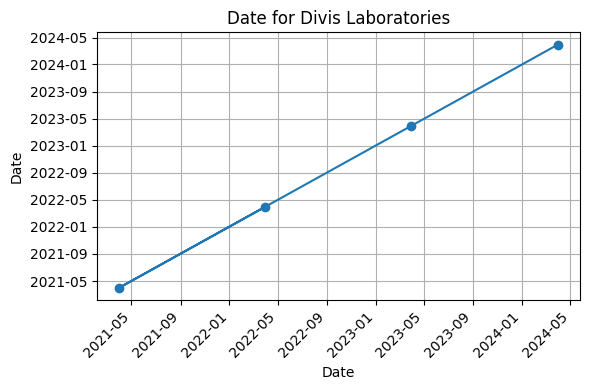

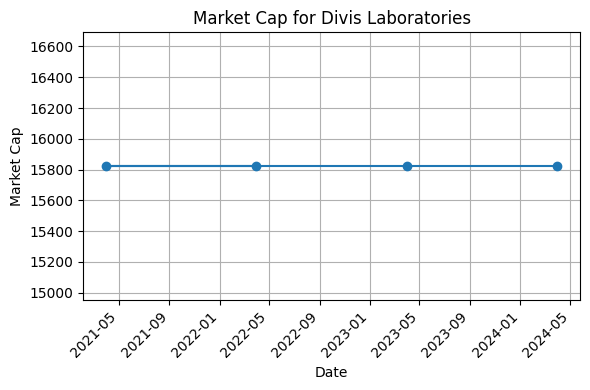

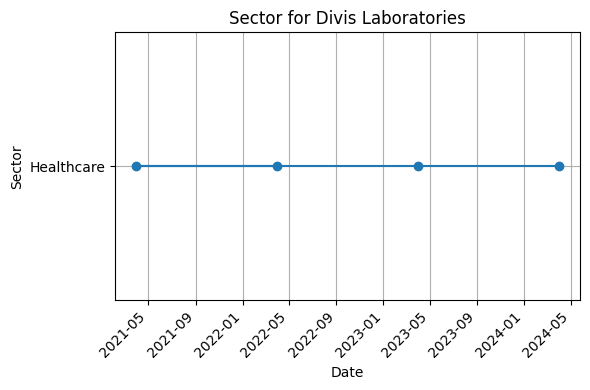

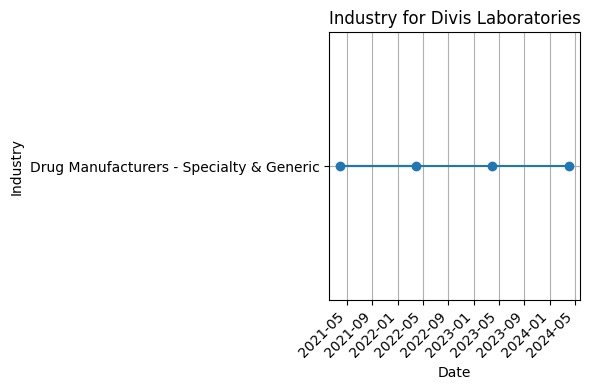

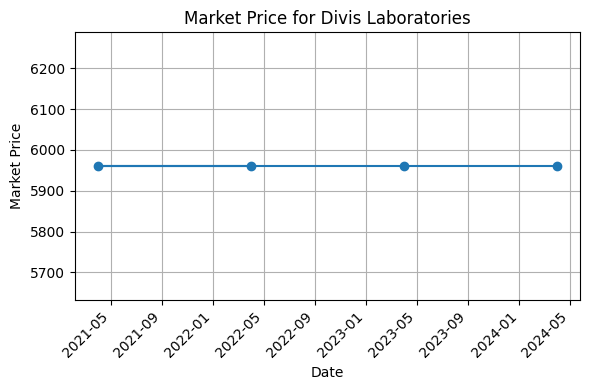

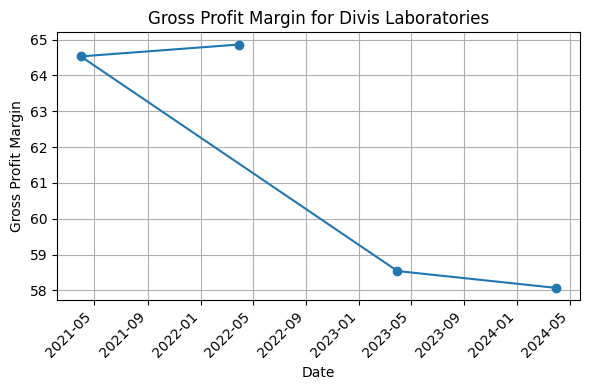

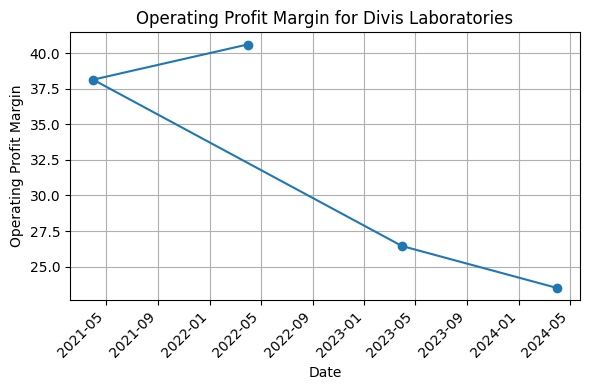

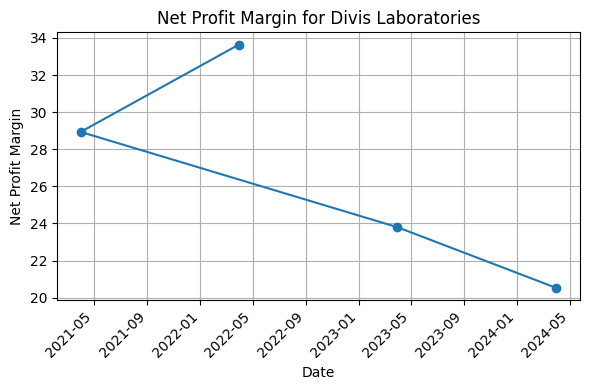

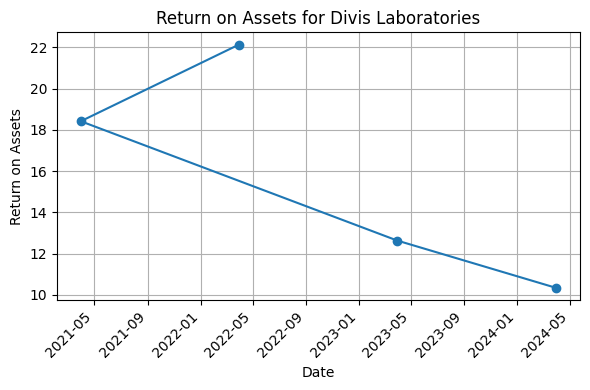

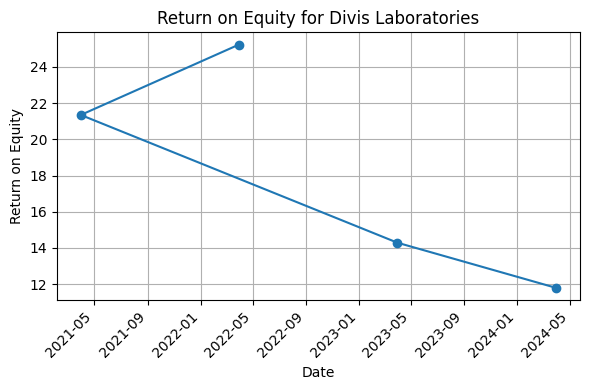

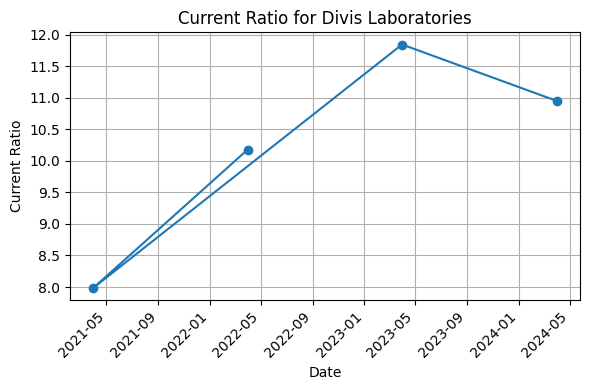

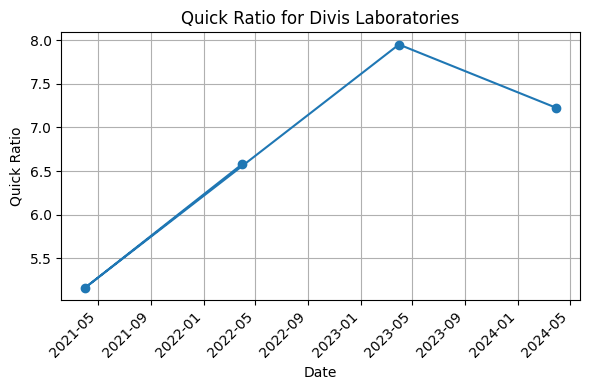

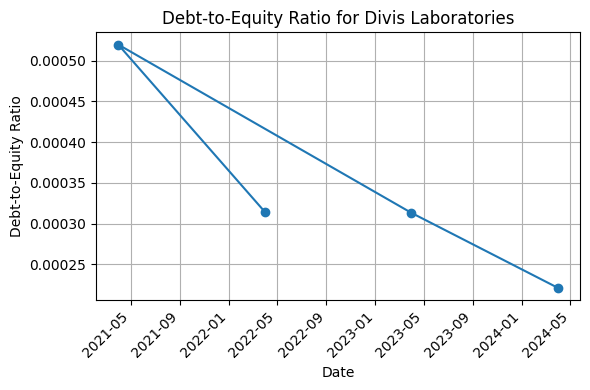

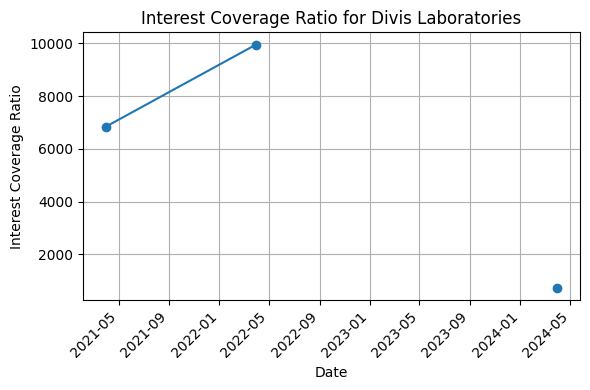

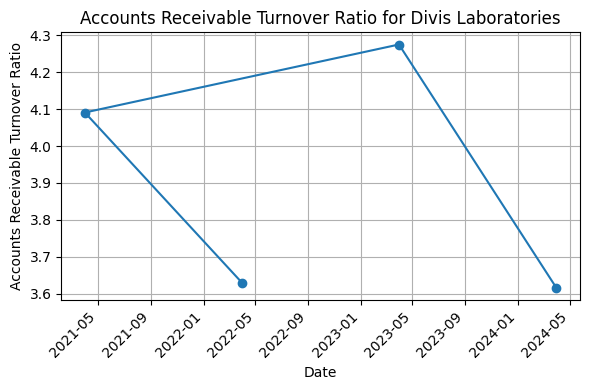

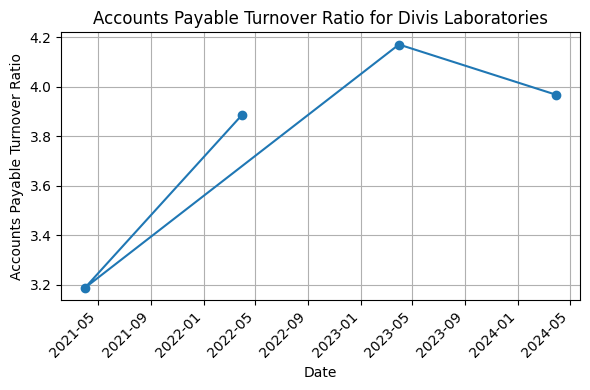

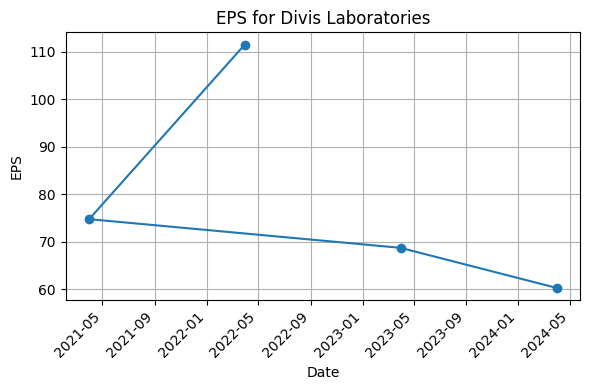

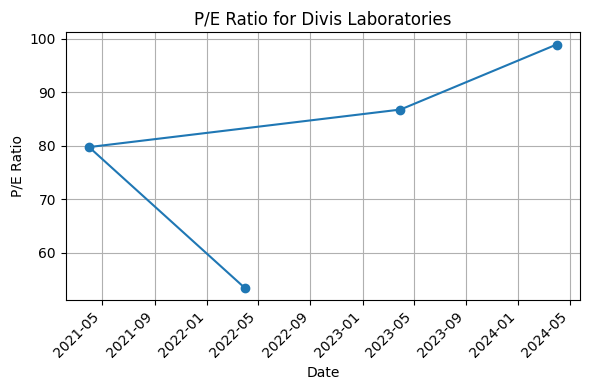

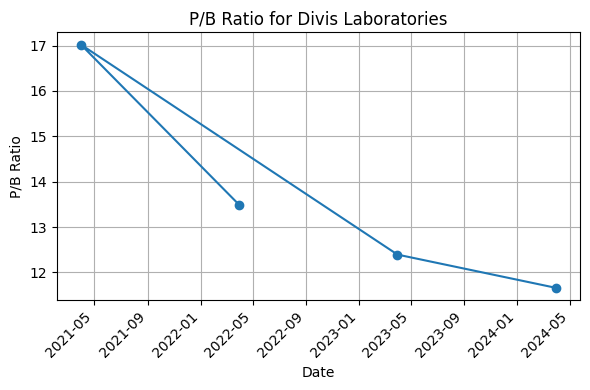

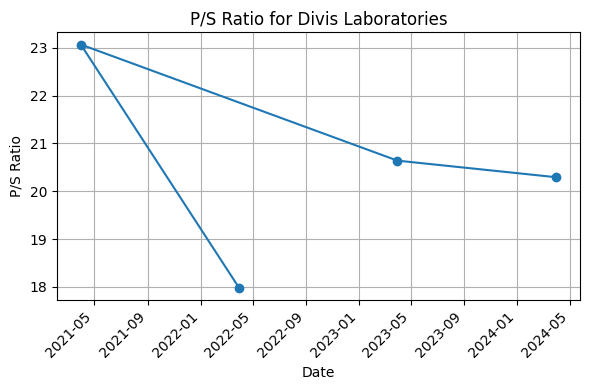

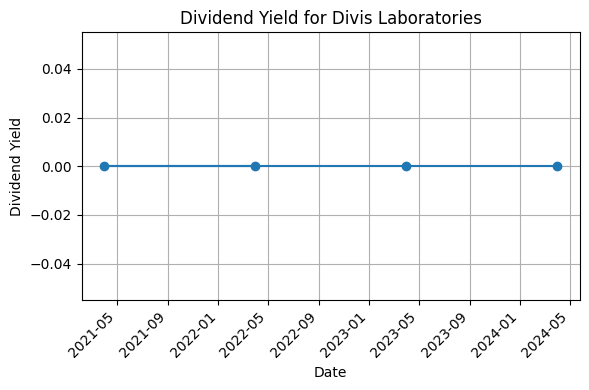

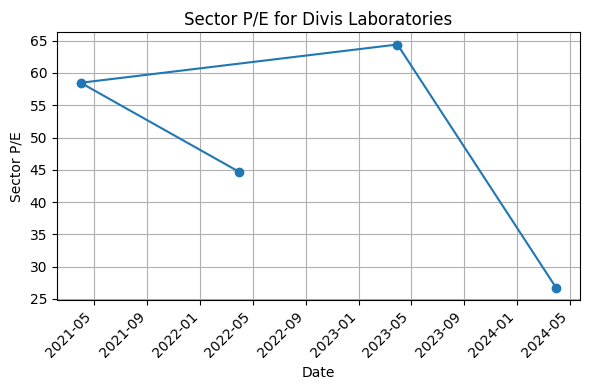

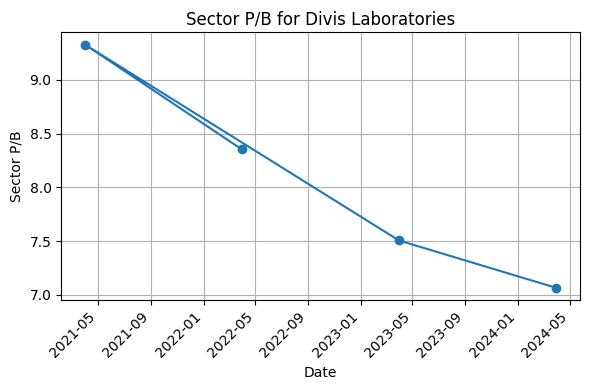

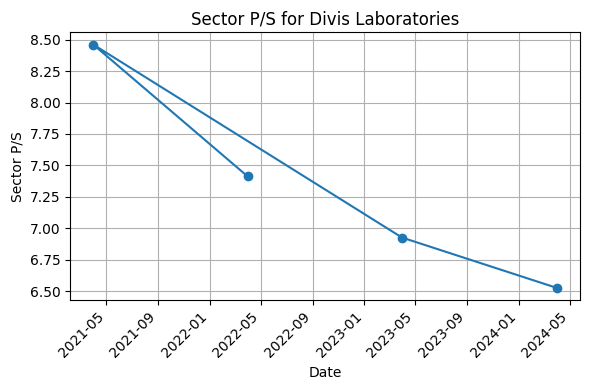

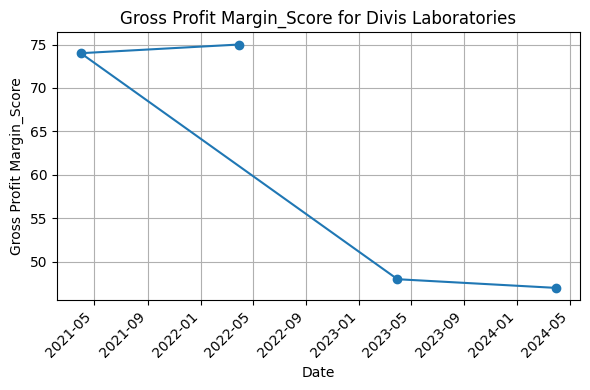

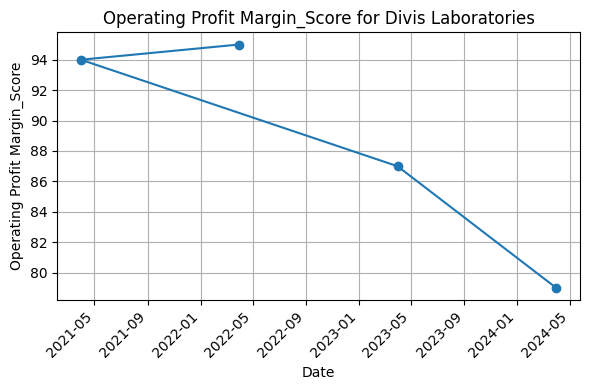

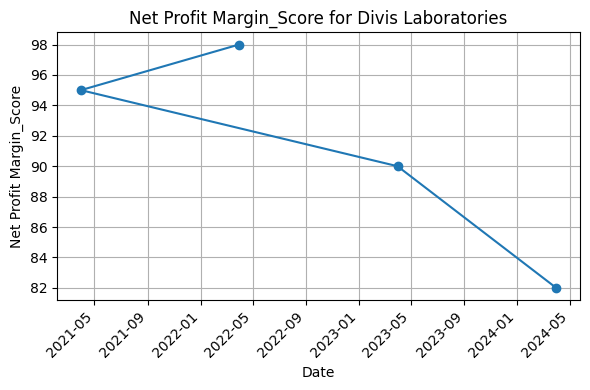

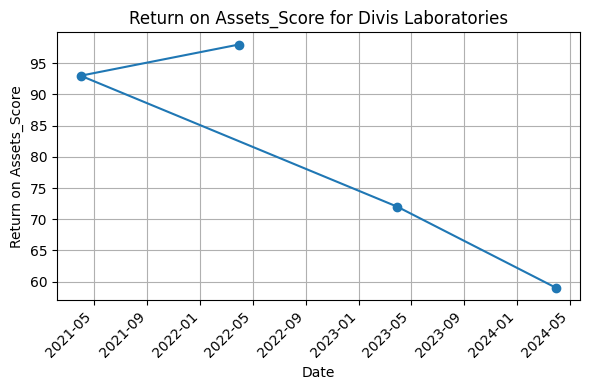

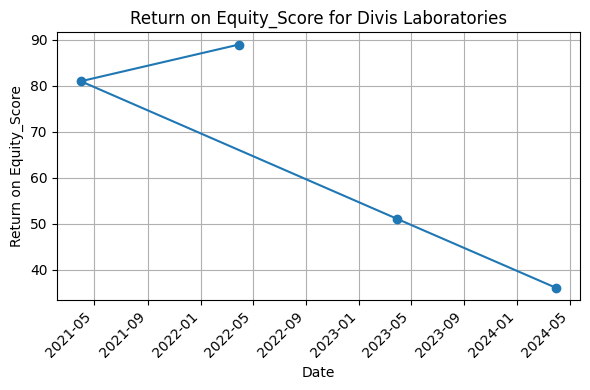

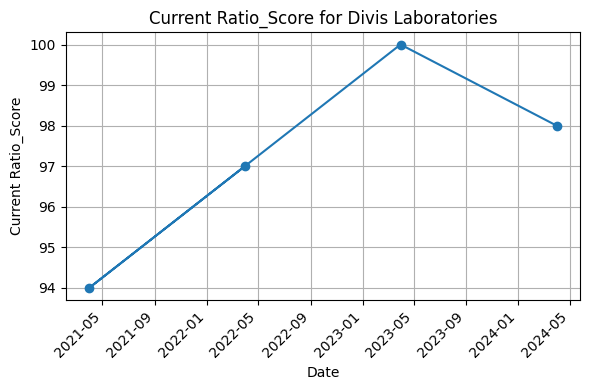

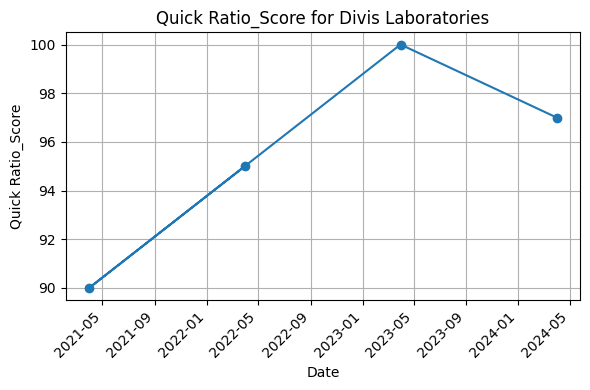

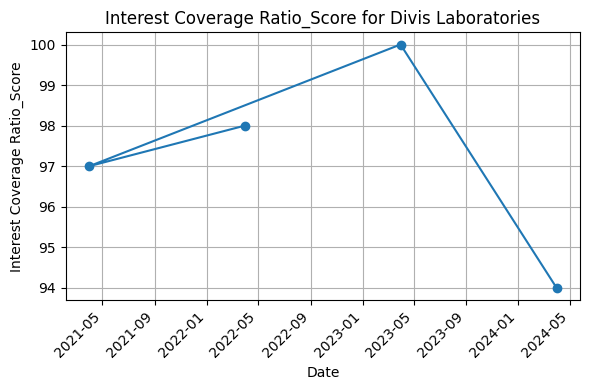

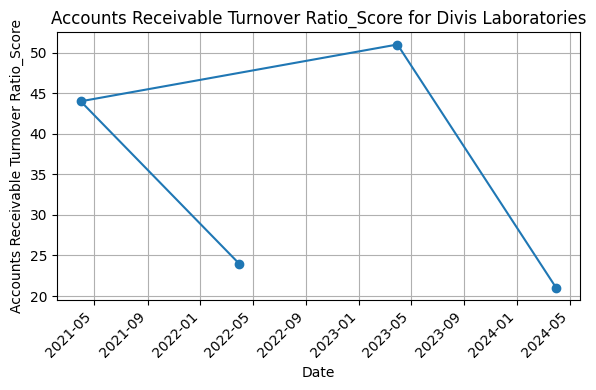

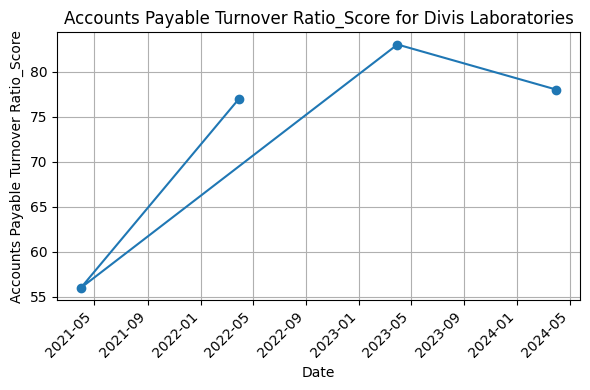

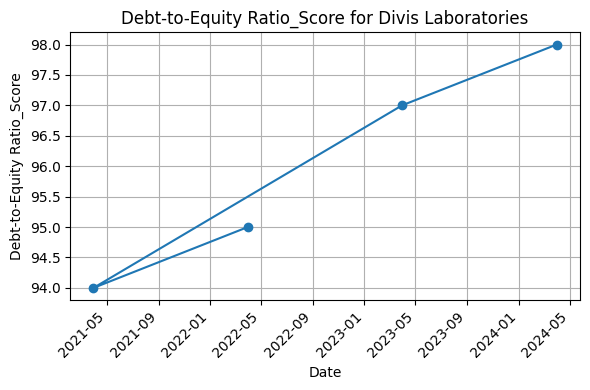

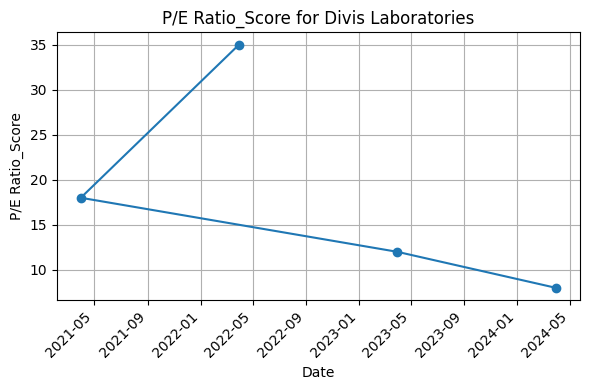

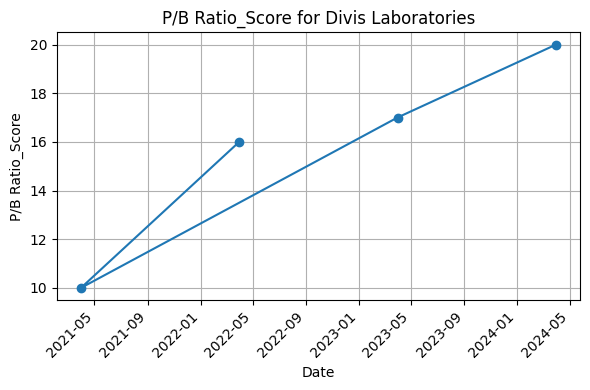

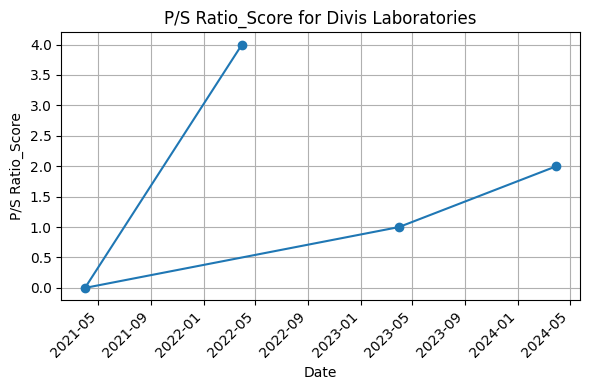

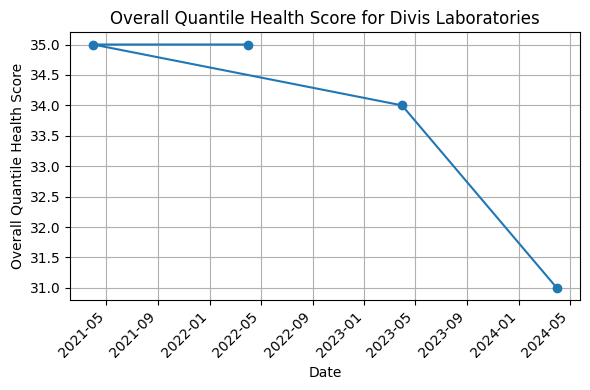

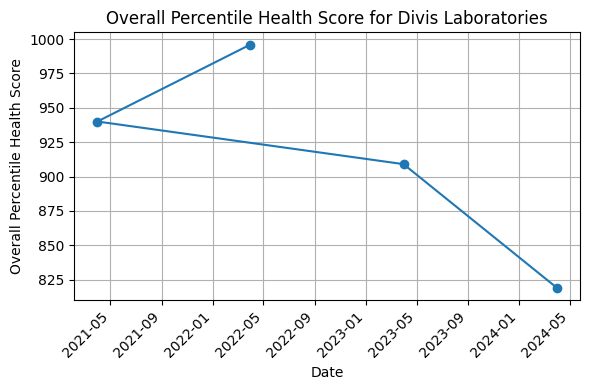

In [30]:
#plot reliance each ratios
import matplotlib.pyplot as plt

# Filter data for Reliance
data = percentile_scoring_df[percentile_scoring_df['Company'] == 'Divis Laboratories']

# Plotting each ratio
for ratio in data.columns[2:]:
    plt.figure(figsize=(6, 4))
    plt.plot(data['Date'], data[ratio], marker='o', linestyle='-')
    plt.title(f'{ratio} for Divis Laboratories')
    plt.xlabel('Date')
    plt.ylabel(ratio)
    plt.grid(True)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()
